In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2#opencv upload,computer vision library
from keras.preprocessing.image import img_to_array#here keras is api
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [ ]:
SIZE=256  #Limiting to 256 size image as my laptop cannot handle larger images.
img_data=[]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


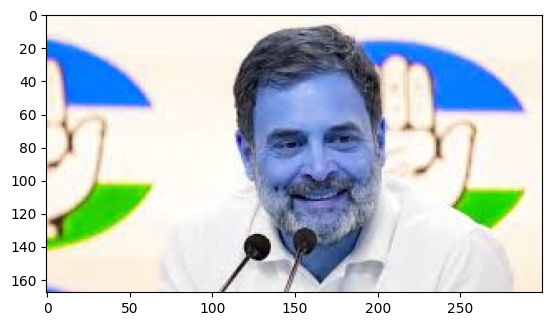

In [ ]:
img=cv2.imread('/content/gandhi.jpeg', 1)   #Change 1 to 0 for Grey scale images
imshow(img)

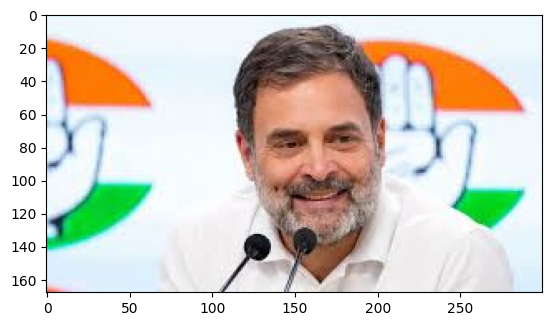

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
imshow(img)

In [ ]:
img=cv2.resize(img,(SIZE, SIZE))#whatever image available convert to 256
img_data.append(img_to_array(img))#converting image to array

array([[[235, 248, 254],
        [235, 248, 254],
        [235, 248, 254],
        ...,
        [239, 248, 253],
        [239, 248, 253],
        [239, 248, 253]],

       [[236, 248, 254],
        [236, 248, 254],
        [236, 248, 254],
        ...,
        [239, 248, 253],
        [239, 248, 253],
        [239, 248, 253]],

       [[237, 248, 254],
        [237, 248, 254],
        [237, 248, 254],
        ...,
        [239, 248, 253],
        [239, 248, 253],
        [239, 248, 253]],

       ...,

       [[242, 140, 122],
        [244, 144, 128],
        [245, 150, 138],
        ...,
        [215, 237, 251],
        [215, 237, 251],
        [215, 237, 251]],

       [[234, 119,  96],
        [236, 122, 102],
        [238, 128, 113],
        ...,
        [215, 237, 251],
        [215, 237, 251],
        [215, 237, 251]],

       [[227, 103,  77],
        [229, 107,  84],
        [232, 113,  96],
        ...,
        [215, 237, 251],
        [215, 237, 251],
        [215, 237, 251]]], dtype=uint8)
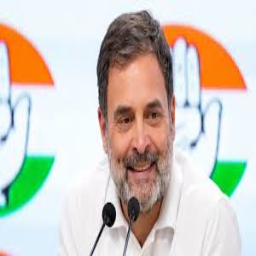

In [ ]:
img#execute

In [ ]:
img[0]#pixel value of gandhi,we are doing data preprocessing

array([[235, 248, 254],
       [235, 248, 254],
       [235, 248, 254],
       [235, 248, 254],
       [235, 248, 254],
       [234, 249, 254],
       [234, 249, 254],
       [232, 250, 254],
       [231, 250, 254],
       [231, 250, 254],
       [230, 251, 254],
       [230, 251, 254],
       [230, 251, 254],
       [233, 249, 253],
       [237, 247, 252],
       [238, 247, 252],
       [238, 247, 252],
       [238, 247, 252],
       [238, 247, 252],
       [238, 247, 252],
       [238, 247, 252],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [239, 248, 253],
       [240, 247

In [ ]:

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [ ]:

img_data2=[]  #Second image to be provided as ground truth.

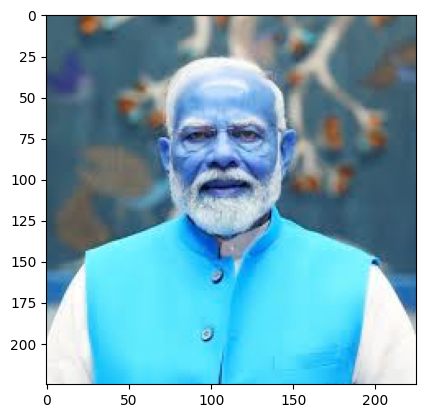

In [ ]:
img2=cv2.imread('/content/modi.jpeg', 1)   #Change 1 to 0 for Grey scale images
imshow(img2)

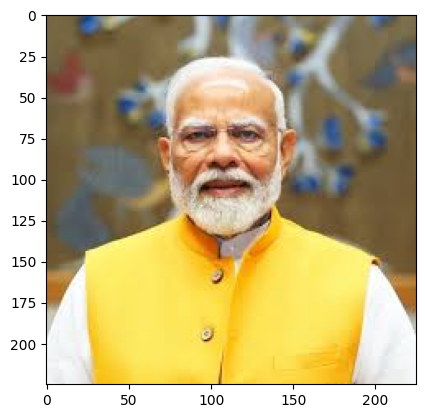

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
imshow(img2)

In [ ]:
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))

In [ ]:
img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.

array([[[117, 101,  65],
        [117, 101,  65],
        [118, 102,  65],
        ...,
        [122, 111,  79],
        [122, 110,  79],
        [121, 107,  78]],

       [[117, 101,  65],
        [117, 101,  65],
        [118, 101,  66],
        ...,
        [122, 111,  79],
        [122, 110,  79],
        [121, 107,  78]],

       [[117, 101,  65],
        [117, 101,  65],
        [118, 102,  66],
        ...,
        [122, 111,  79],
        [122, 110,  80],
        [121, 108,  76]],

       ...,

       [[247, 248, 250],
        [246, 247, 249],
        [245, 245, 248],
        ...,
        [246, 248, 248],
        [246, 248, 250],
        [245, 249, 252]],

       [[247, 248, 250],
        [246, 248, 249],
        [245, 246, 248],
        ...,
        [246, 248, 247],
        [246, 248, 250],
        [245, 249, 252]],

       [[241, 245, 246],
        [242, 246, 247],
        [244, 247, 249],
        ...,
        [246, 248, 245],
        [246, 248, 248],
        [245, 249, 252]]], dtype=uint8)
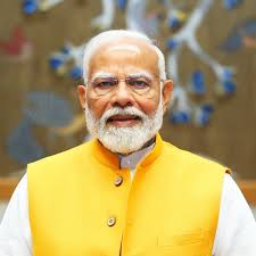

In [ ]:
img2

In [ ]:
#Define Autoencoder model.

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))#32 types of filter,can be 64,3,3 matrix se pool kia so 256-3+1=254
model.add(MaxPooling2D((2, 2), padding='same'))#max pooling se half kia
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

In [ ]:
model.add(MaxPooling2D((2, 2), padding='same'))

In [ ]:
#first data preparation
#algorithm architechture
#now play with epochs

In [ ]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 8)         0

In [ ]:
model.fit(img_array, img_array2,
        epochs=500,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 0.4044 - accuracy: 0.1485
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3891 - accuracy: 0.0665
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3620 - accuracy: 0.0639
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3307 - accuracy: 0.0637
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 0.2983 - accuracy: 0.0637
Epoch 6/500
1/1 [==============================] - 0s 22ms/step - loss: 0.2801 - accuracy: 0.0637
Epoch 7/500
1/1 [==============================] - 0s 20ms/step - loss: 0.2873 - accuracy: 0.0637
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 0.2794 - accuracy: 0.0637
Epoch 9/500
1/1 [==============================] - 0s 18ms/step - loss: 0.2579 - accuracy: 0.0638
Epoch 10/500
1/1 [==============================] - 0s 19ms/step - loss: 0.2410 - accuracy: 0.0661
Epoch 11/500
1/1 [===

In [ ]:
print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.

Output
1/1 [==============================] - 0s 273ms/step


In [ ]:

#In reality, train on 1000s of input images and predict on images that the training
#algorithm never saw.

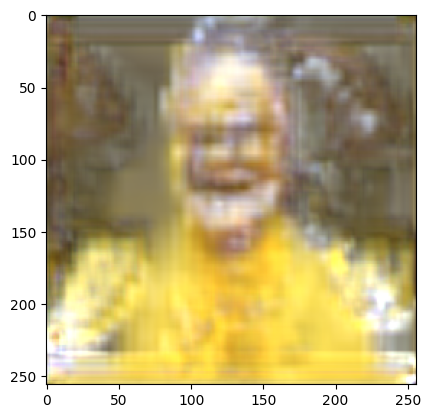

In [ ]:

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

In [ ]:
#img2 = Image.fromarray(pred[0], 'RGB')
#imshow(img2)
#img2.save("processed_img.jpg")

In [ ]:
model.fit(img_array, img_array2,
        epochs=5000,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step - loss: 0.0045 - accuracy: 0.8562
Epoch 2502/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.0045 - accuracy: 0.8557
Epoch 2503/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.0045 - accuracy: 0.8557
Epoch 2504/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.0046 - accuracy: 0.8551
Epoch 2505/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.0047 - accuracy: 0.8550
Epoch 2506/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.0046 - accuracy: 0.8583
Epoch 2507/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.0045 - accuracy: 0.8569
Epoch 2508/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.0047 - accuracy: 0.8539
Epoch 2509/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.0046 - accuracy: 0.8558
Epoch 2510/5000
1/1 [==========================

In [ ]:
print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.

Output
1/1 [==============================] - 0s 23ms/step


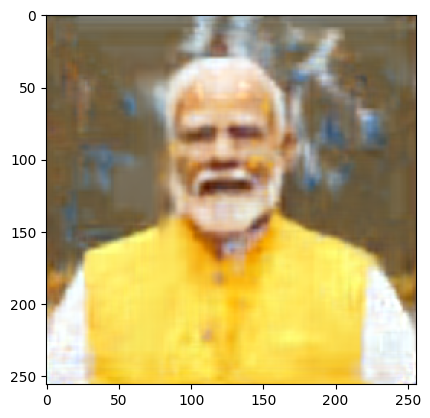

In [ ]:

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")